In [32]:

import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO
import numpy as np
import cv2



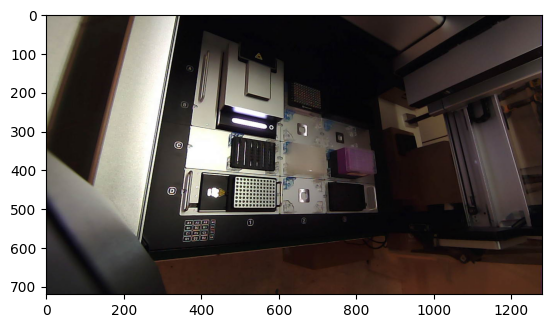

In [70]:
url = 'http://192.168.0.85:31950/camera/picture'

r = requests.post(url,headers={'Opentrons-Version':'2'})
# print(r.content)
im = Image.open(BytesIO(r.content))
 
plt.imshow(im)

Perspective Transform

In [33]:
def order_points(pts):
	# initialzie a list of coordinates that will be ordered
	# such that the first entry in the list is the top-left,
	# the second entry is the top-right, the third is the
	# bottom-right, and the fourth is the bottom-left
	rect = np.zeros((4, 2), dtype = "float32")
	# the top-left point will have the smallest sum, whereas
	# the bottom-right point will have the largest sum
	s = pts.sum(axis = 1)
	rect[0] = pts[np.argmin(s)]
	rect[2] = pts[np.argmax(s)]
	# now, compute the difference between the points, the
	# top-right point will have the smallest difference,
	# whereas the bottom-left will have the largest difference
	diff = np.diff(pts, axis = 1)
	rect[1] = pts[np.argmin(diff)]
	rect[3] = pts[np.argmax(diff)]
	# return the ordered coordinates
	return rect

def four_point_transform(image, pts):
	# obtain a consistent order of the points and unpack them
	# individually
	rect = order_points(pts)
	(tl, tr, br, bl) = rect
	# compute the width of the new image, which will be the
	# maximum distance between bottom-right and bottom-left
	# x-coordiates or the top-right and top-left x-coordinates
	widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
	widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
	maxWidth = max(int(widthA), int(widthB))
	# compute the height of the new image, which will be the
	# maximum distance between the top-right and bottom-right
	# y-coordinates or the top-left and bottom-left y-coordinates
	heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
	heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
	maxHeight = max(int(heightA), int(heightB))
	# now that we have the dimensions of the new image, construct
	# the set of destination points to obtain a "birds eye view",
	# (i.e. top-down view) of the image, again specifying points
	# in the top-left, top-right, bottom-right, and bottom-left
	# order
	dst = np.array([
		[0, 0],
		[maxWidth - 1, 0],
		[maxWidth - 1, maxHeight - 1],
		[0, maxHeight - 1]], dtype = "float32")
	# compute the perspective transform matrix and then apply it
	M = cv2.getPerspectiveTransform(rect, dst)
	warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
	# return the warped image
	return warped

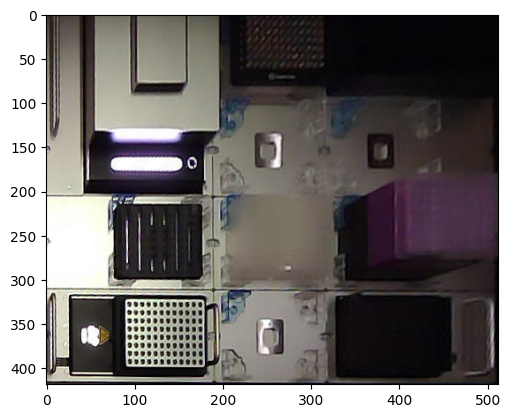

In [69]:
coords=np.array([[346,521],[402,105],[858,510],[830,245]])

# load the image and grab the source coordinates (i.e. the list of
# of (x, y) points)
# NOTE: using the 'eval' function is bad form, but for this example
# let's just roll with it -- in future posts I'll show you how to
# automatically determine the coordinates without pre-supplying them
pts = coords
# apply the four point tranform to obtain a "birds eye view" of
# the image
image=np.array(im)
warped = four_point_transform(image, pts)
plt.imshow(warped)

A1


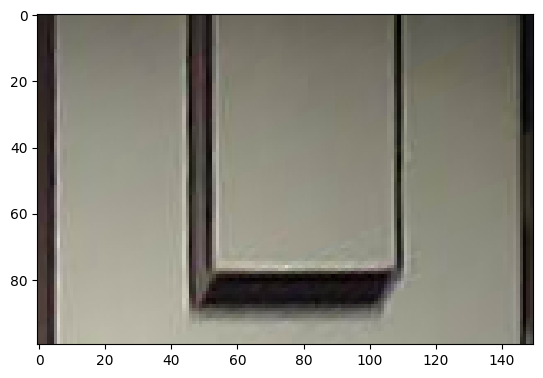

A2


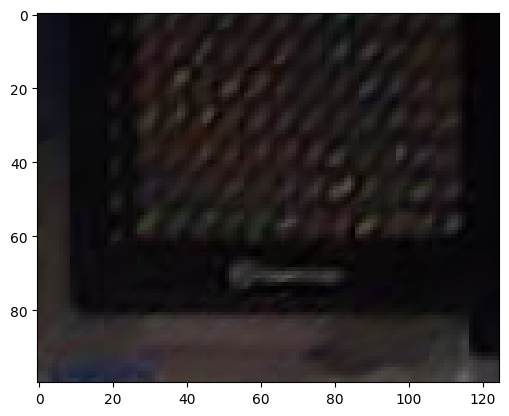

A3


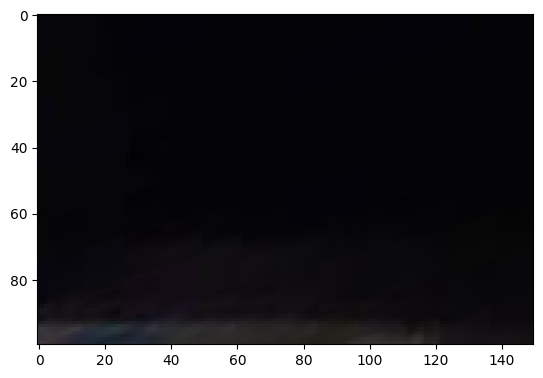

B1


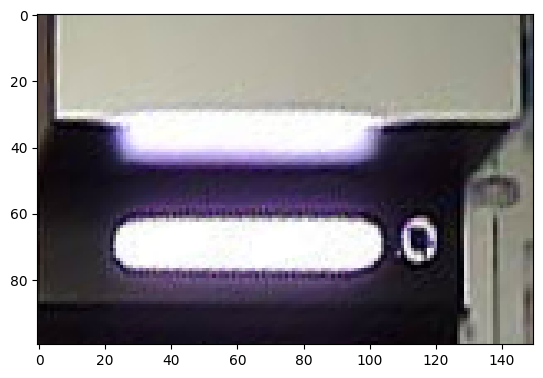

B2


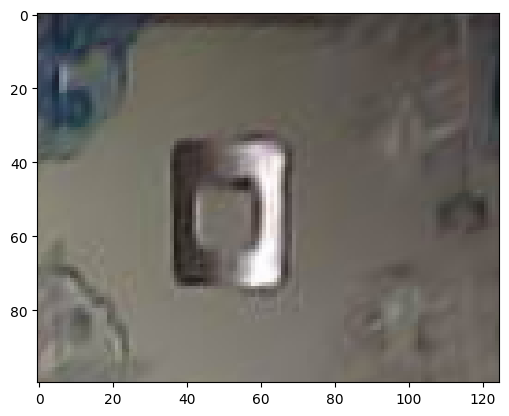

B3


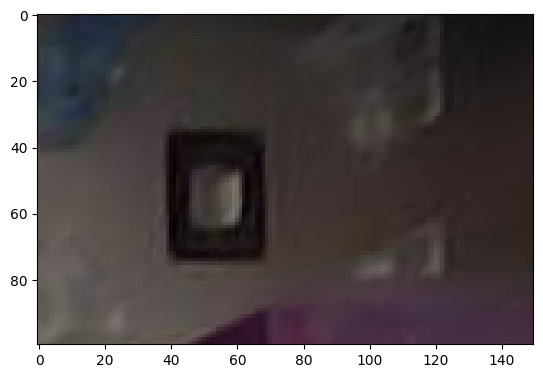

C1


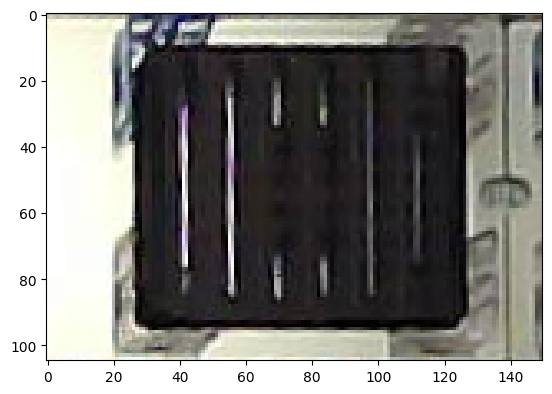

C2


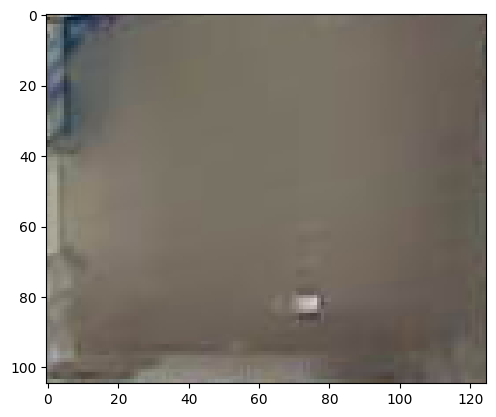

C3


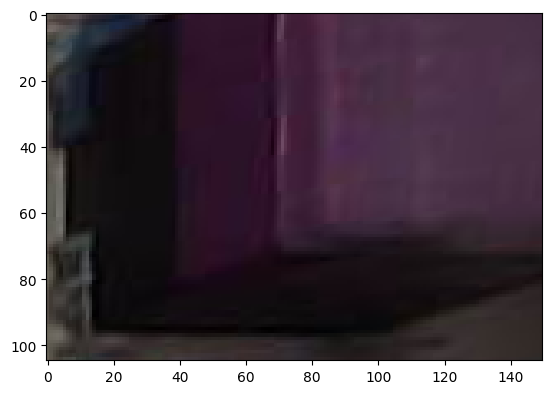

D1


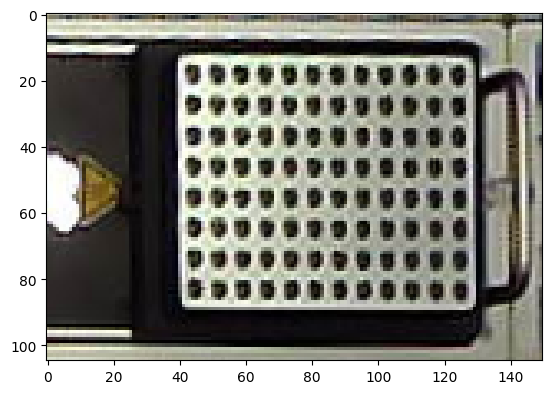

D2


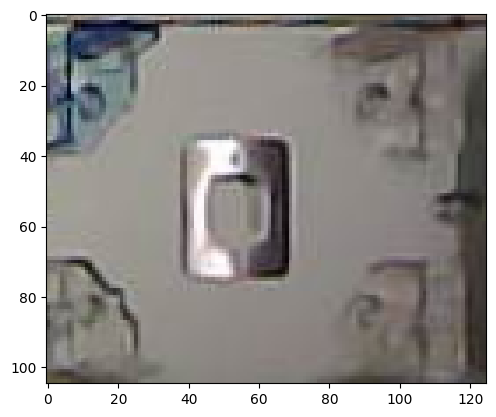

D3


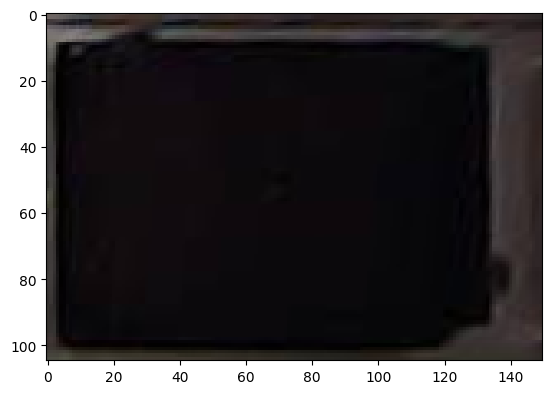

In [89]:
decks={'A1':warped[0:100,50:200],'A2':warped[0:100,200:325],'A3':warped[0:100,325:475],
       'B1':warped[100:200,50:200],'B2':warped[100:200,200:325],'B3':warped[100:200,325:475],
        'C1':warped[205:310,50:200],'C2':warped[205:310,200:325],'C3':warped[205:310,325:475],
        'D1':warped[310:415,50:200],'D2':warped[310:415,200:325],'D3':warped[310:415,325:475]}
for deck,subimage in decks.items():
    print(deck)
    plt.imshow(subimage)
    plt.show()